In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

plt.style.use("seaborn-poster")

In [48]:

pc_list = (50, 75, 90, 100)
Days_list = (-3,-2,-1,0,1,2)
path = "./allpc_" #"./results/pc_"
df = pd.DataFrame()


for file in glob.glob(path+"*.csv"):
    temp = pd.read_csv(file)
    #temp['pc'] = pc
    #temp['DAYS'] = days
    df = df.append(temp)

df.head()

,DAYS,actual_gen_times_25,actual_gen_times_75,actual_gen_times_mean,cases,pc,prop_cases_prevented_25,prop_cases_prevented_75,prop_cases_prevented_mean,sim
0,0.0,1.052998,4.002547,2.778072,4229,1.0,0.375,1.0,0.752868,0
1,0.0,1.052998,4.002547,2.778072,18,1.0,0.375,1.0,0.752868,1
2,0.0,1.052998,4.002547,2.778072,52,1.0,0.375,1.0,0.752868,2
3,0.0,1.052998,4.002547,2.778072,3242,1.0,0.375,1.0,0.752868,3
4,0.0,1.052998,4.002547,2.778072,52,1.0,0.375,1.0,0.752868,4


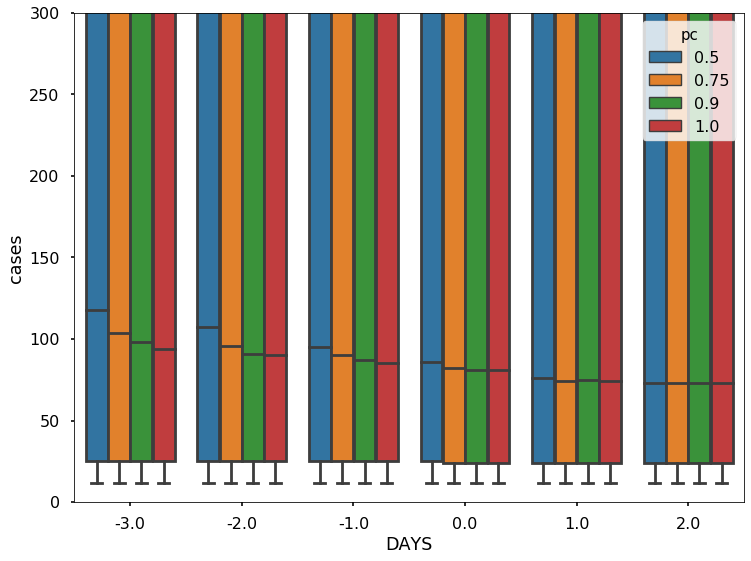

In [52]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(12,9))
sns.boxplot(
    x="DAYS",
    y="cases",
    hue="pc",
    data =df,
    ax=ax
    )
ax.set_ylim((0,300))
plt.show()

In [36]:
def toy(child,parent_detected, DAYS=-2, parent_sot = 5, parent_at = 8):
    from random import random
    if parent_detected:
        print("parent detected")
        if child < parent_sot + DAYS:
            print("Too early, not traced")
        elif child < parent_at:
            if random()< 0.5:
                print("Traced")
            else:
                print("Not traced")
    else:
        print("parent undetected")


In [47]:
toy(3, False)

parent undetected
